# Codigo de la figura 2.8: Funciones delta utilizadas en un modelo IF



# 0. Importar bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Creación de funciones


## IntegrateAndFireNeuron:
Clase que representa una neurona del modelo integrar-y-disparar con parámetros específicos.

### Métodos:
- `__init__(self, tau, threshold=0.3, reset_potential=0.0)`: 
  Inicializa la neurona con los parámetros dados, permitiendo valores por defecto si no se proporcionan.

  Parámetros:
  - `tau`: Constante de tiempo de la membrana neuronal.
  - `threshold=0.3`: Umbral de disparo de la neurona.
  - `reset_potential=0.0`: Potencial de reinicio de la neurona.

### Atributos:
- `tau`: Constante de tiempo de la membrana neuronal.
- `threshold`: Umbral de disparo de la neurona.
- `reset_potential`: Potencial de reinicio de la neurona.
- `potential`: Potencial de membrana actual.

### Método adicional:
- `integrate_and_fire(self, input_current, time_step, duration)`: 
  Simula la evolución temporal de la neurona en respuesta a una corriente de entrada.

  Parámetros:
  - `input_current`: Corriente de entrada.
  - `time_step`: Paso de tiempo en la simulación.
  - `duration`: Duración total de la simulación.

  Retorna:
  - `time_points`: Array de tiempos durante la simulación.
  - `membrane_potential`: Lista de potenciales de membrana a lo largo del tiempo.
  - `spikes`: Lista de tiempos en los que la neurona hadisparado (superado el umbral).


In [2]:
class IntegrateAndFireNeuron:
    def __init__(self, tau, threshold=0.3, reset_potential=0.0):
        self.tau = tau
        self.threshold = threshold
        self.reset_potential = reset_potential
        self.potential = 0.0
      
    def integrate_and_fire(self, input_current, time_step, duration):
        time_points = np.arange(0, duration, time_step)
        membrane_potential = []
        spikes = []
        for t in time_points:
            self.potential += (input_current - self.potential) * (1 - np.exp(-time_step / self.tau))
            membrane_potential.append(self.potential)
            if self.potential >= self.threshold:
                spikes.append(t)
                self.potential = self.reset_potential
            elif self.potential <= self.reset_potential:
                self.potential = 0.0
        return time_points, membrane_potential, spikes

# 2. Variables de entorno

- `tau = 10.0`: Constante de tiempo de la membrana neuronal.
- `threshold = 0.3`: Umbral de disparo de la neurona.
- `reset_potential = 0.0`: Potencial de reinicio de la neurona.
- `input_current = 0.4`: Corriente de entrada para la simulación.
- `time_step = 0.1`: Paso de tiempo en la simulación.
- `duration = 50.0`: Duración total de la simulación.

In [3]:
tau = 10.0
threshold = 0.3
reset_potential = 0.0
input_current = 0.4
time_step = 0.1
duration = 50.0

# 3. Simulación de la Neurona Integrar-y-Disparar

- `neuron = IntegrateAndFireNeuron(tau, threshold, reset_potential)`: 
  Se crea una instancia de la clase `IntegrateAndFireNeuron` con los parámetros especificados para simular una neurona integrar-y-disparar.

  Resultados de la simulación:
  - `time_points`: Array de tiempos durante la simulación.
  - `membrane_potential`: Lista de potenciales de membrana a lo largo del tiempo.
  - `spikes`: Lista de tiempos en los que la neurona ha disparado (superado el umbral).

  La simulación se realiza utilizando la corriente de entrada `input_current`, un paso de tiempo `time_step` y una duración total de simulación `duration`. Durante la simulación, se registra la evolución temporal del potencial de membrana, y se identifican los momentos en los que la neurona dispara (supera el umbral), registrando esos tiempos en `spikes`.


In [4]:
neuron = IntegrateAndFireNeuron(tau, threshold, reset_potential)
time_points, membrane_potential, spikes = neuron.integrate_and_fire(input_current, time_step, duration)

In [5]:
print("Valores t de spikes", spikes)

Valores t de spikes [13.8, 27.700000000000003, 41.6]


# 3. Dibujo de la funcion delta de Dirac en los instantes t0, t1, y t2

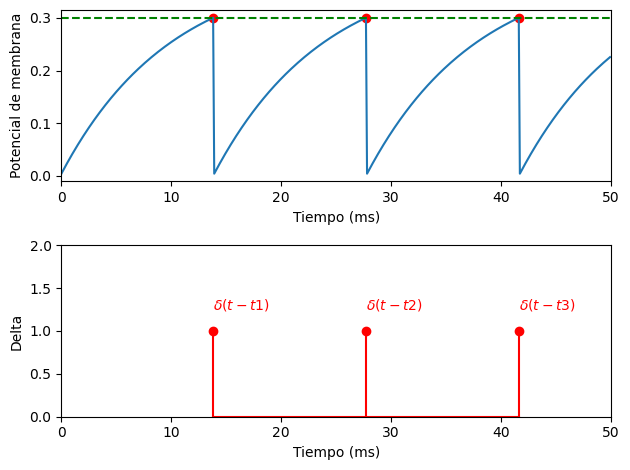

In [6]:
#Visualización (arriba) Modelo IF
plt.subplot(2, 1, 1)
plt.xlim(0, 50)
plt.plot(time_points, membrane_potential, label='Potencial de membrana')
plt.scatter(spikes, [threshold] * len(spikes), color='r', label='Spikes')
plt.axhline(y=threshold, color='g', linestyle='dashed', label='Umbral')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Potencial de membrana')

#Visualización (abajo) uso de las funciones Delta en modelo IF
plt.subplot(2, 1, 2)
plt.stem(spikes, np.ones_like(spikes), linefmt='r', markerfmt='ro', basefmt='r', label='Delta')
plt.xlim(0, 50)
plt.ylim(0, 2)  
plt.text(13.8, 1.25, '$\delta(t - t1)$', color='r')
plt.text(27.7, 1.25, '$\delta(t - t2)$', color='r')
plt.text(41.6, 1.25, '$\delta(t - t3)$', color='r')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Delta')
plt.tight_layout()
plt.show()